## 2.1 使用真实数据
本章将介绍一个端到端的项目案例（End-to-End Machine Learning Project）。假设你是一个房地产公司最近新雇用的数据科学家，以下是你将会经历的主要步骤：

1.纵览全局。

2.获得数据。

3.从数据探索和可视化中获得洞见。

4.机器学习算法的数据准备与清洗。

5.选择并训练模型。

6.微调（Fine-tune）模型。

7.展示解决方案。

8.启动、监控和维护系统。

我们从StatLib库中选择了加州住房价格的数据集。该数据集基于1990年加州人口普查的数据。
![](png/15.png)

## 2.2 纵览全局

### 2.2.1 框架问题

欢迎来到机器学习房产公司！你要做的第一件事是使用加州人口普查的数据建立起加州的房价模型。数据中有许多指标，诸如每个街区的人口数量、收入中位数、房价中位数等。
你的模型需要从这个数据中学习，从而能够根据所有其他指标，预测任意区域的房价中位数。

首先，你需要回答框架问题：是有监督学习、无监督学习还是强化学习？是分类任务、回归任务还是其他任务？

* 显然，这是一个典型的有监督学习任务，因为已经给出了标记的训练示例（每个实例都有预期的产出，也就是该区域的房价中位数）。
* 并且这也是一个典型的回归任务，因为你要对某个值进行预测。更具体地说，这是一个多重回归问题，因为系统要使用多个特征进行预测（使用区域的人口、收入中位数等）。这也是一元回归问题，因为我们仅尝试预测每个区域的单个值。如果我们试图预测每个区域的多个值，那将是多元回归问题。
* 最后，我们没有一个连续的数据流不断流进系统，所以不需要针对变化的数据做出特别调整，数据量也不是很大，不需要多个内存，所以简单的批量学习应该就能胜任。

### 2.2.2 选择模型性能评估指标
* 回归问题的典型性能指标是均方根误差（RMSE）。它给出了系统通常会在预测中产生多大误差，对于较大的误差，权重较高。
<img src="https://i.loli.net/2021/03/03/T79nWOkvjicpQf3.jpg" width="50%">

* 尽管RMSE通常是回归任务的首选性能指标，但在某些情况下，你可能更喜欢使用其他函数。例如，假设有许多异常区域。在这种情况下，你可以考虑使用平均绝对误差（Mean Absolute Error，MAE）
<img src="https://i.loli.net/2021/03/03/dFN2XPYhcIHk7Dx.png" width="50%">

### 2.2.3 初期的假设检查
最后，列举和验证到目前为止（由你或者其他人）做出的假设，是一个非常好的习惯。这可以在初期检查出严重问题。

例如，当机器学习系统输出区域价格给下游系统时，我们的假设是价格会被使用。但是，
如果下游系统实际上是将价格转换成为类别（例如，廉价、中等或者昂贵），转而使用这些类别，而不是价格本身呢？在这种情形下，并不需要完全准确地预估价格，你的系统只需要得出正确的类别就够了。如果是这种情况，那么这个问题应该被设定为分类任务而不是回归任务。你肯定不会愿意在回归系统上努力了几个月之后才发现这一点。

## 2.3 获取数据
### 2.3.1 创建一个隔离环境
在我们日常的项目开发过程中，我们通常会按照项目的需求去下载相应的框架库，如Django、request等，但是不同的项目所使用的框架库并不一定是相同的，或者使用相同的框架但是版本需求是不同的，这时候需要我们根据需求不断的安装，更新或卸载相应的库。
虚拟环境：每一个环境都相当于一个新的Python。你可以在这个新的环境里安装三方库，环境与环境之间是相互隔离的，也就是说在A环境中安装的库只在A中使用，不会影响其他环境。

总结：虚拟环境可以让系统Python环境保持纯洁，干净，避免包的混乱和版本的冲突。如果你希望在一个隔离的环境里工作（强烈推荐，这样你可以在库版本不冲突的情况下处理不同的项目），可以通过运行以下pip命令来安装一个虚拟环境（virtualenv）。
https://blog.csdn.net/hejp_123/article/details/92151293?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161467818516780274162307%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161467818516780274162307&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-92151293.pc_search_result_hbase_insert&utm_term=anaconda%E5%88%A0%E9%99%A4%E8%99%9A%E6%8B%9F%E7%8E%AF%E5%A2%83

### 2.3.2 数据总览

In [2]:
import pandas as pd
housing = pd.read_csv('housing.csv')

In [3]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# 通过info（）方法可以快速获取数据集的简单描述，特别是总行数、每个属性的类型和非空值的数量
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


数据集中包含20 640个实例，以机器学习的标准来看，这个数字非常小。注意，total_bedrooms这个属性只有20433个非空值，这意味着有207个区域缺失这个特征。我们后面需要考虑到这一点。

所有属性的字段都是数字，除了ocean_proximity。它的类型是object，因此它可以是任何类型的Python对象，不过因为你从CSV文件中加载了该数据，所以它必然是文本属性。通过查看前5行，你可能会注意到，该列中的值是重复的，这意味着它有可能是一个分类属性。

In [5]:
# 可以使用value_counts（）方法查看有多少种分类存在，每种类别下分别有多少个值:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#通过describe（）方法可以显示数值属性的摘要
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


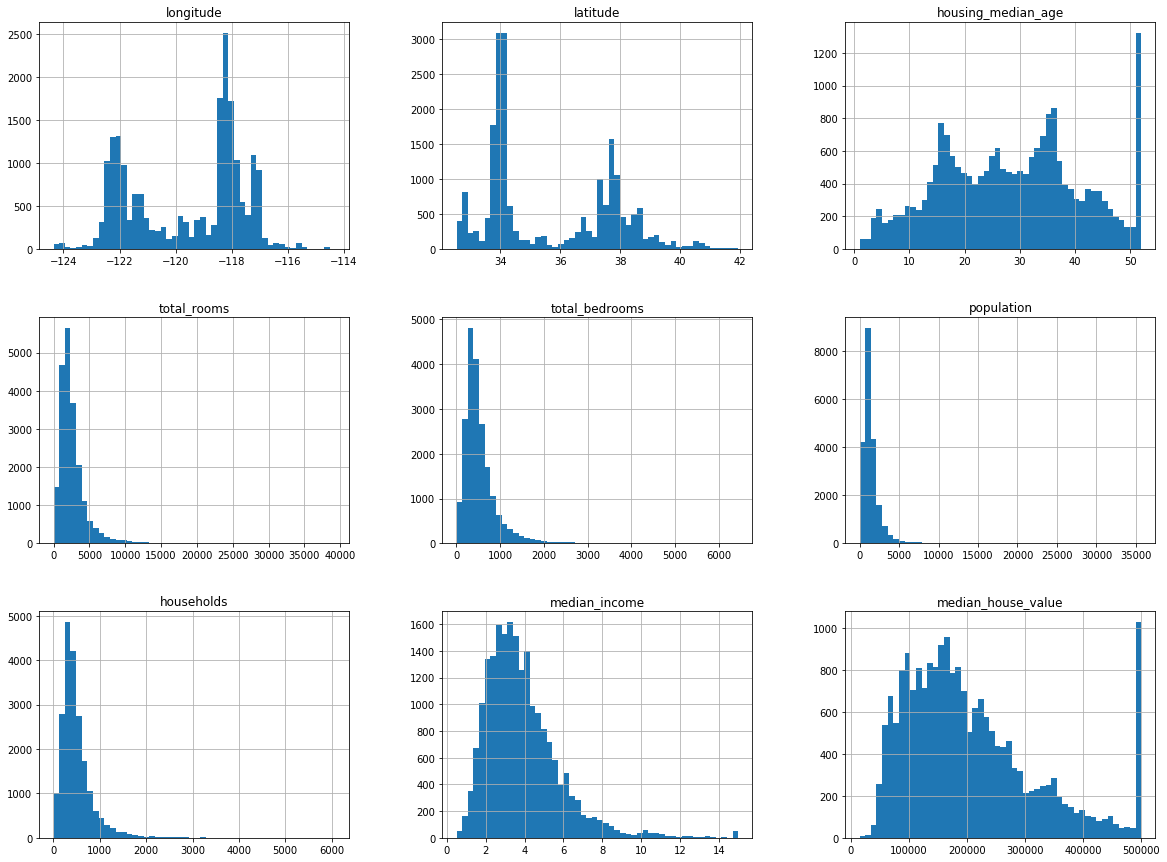

In [11]:
# 另一种快速了解数据类型的方法是绘制每个数值属性的直方图。直方图用来显示给定值范围（横轴）的实例数量（纵轴）%matplotlib inline  
# 设置Matplotlib从而使用Jupyter自己的后端，随后图形会在notebook上呈现
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

1.首先，收入中位数这个属性看起来不像是用美元（USD）在衡量。经与收集数据的团队核实，你得知数据已经按比例缩小，并框出中位数的上限为15（实际为15.0001），下限为0.5（实际为0.4999）。数字后的单位为万美元，例如，15代表15万美元。在机器学习中，使用经过预处理的属性是很常见的事情，倒不一定是个问题，但是你至少需要了解数据是如何计算的。

2.房龄中位数和房价中位数也被设定了上限。而由于后者正是你的目标属性（标签），因此这可能是个大问题。你的机器学习算法很可能会学习到价格永远不会超过这个限制。你需要再次与客户团队（使用你的系统输出的团队）进行核实，查看是否存在问题。如果他们告诉你，他们需要精确的预测值，甚至可以超过50万美元，那么，通常你有两个选择：
* a.对那些标签值被设置了上限的区域，重新收集标签值。
* b.将这些区域的数据从训练集中移除（包括从测试集中移除，因为如果预测值超过50万美元，系统不应因为人为地设置上限而被评估为不良）。

3.最后，许多直方图都表现出重尾：图形在中位数右侧的延伸比左侧要远得多。这可能会导致某些机器学习算法难以检测模式。稍后我们会尝试一些转化方法，将这些属性转化为更偏向钟形的对称分布。

### 2.3.3 创建测试集

In [12]:
'''理论上，创建测试集非常简单，只需要随机选择一些实例，通常是数据集的20%（如果数据集很大，比例将更小），
然后将它们放在测试集中。 '''
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #对给定的数组进行重新随机排列
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set),len(test_set))

16512 4128


但这种方法并不完美。因为如果再运行一遍，它又会产生一个不同的数据集！这样下去，你（或者你的机器学习算法）将会看到整个完整的数据集，而这正是创建测试集时需要避免的。

解决方案：
- 1.运行程序后即保存测试集，随后的运行只是加载它而已。另一种方法是在调用np.random.permutation（）之前设置一个随机数生成器的种子（例如，np.random.seed（42）），从而让它始终生成相同的随机索引。

- 2.但是，这两种解决方案在下一次获取更新的数据时都会失效。为了即使在更新数据集之后也有一个稳定的训练测试分割，常见的解决方案是每个实例都使用一个标识符来决定是否进入测试集（假定每个实例都有一个唯一且不变的标识符）。例如，你可以计算每个实例标识符的哈希值，如果这个哈希值小于或等于最大哈希值的20%，则将该实例放入测试集。这样可以确保测试集在多个运行里都是一致的，即便更新数据集也仍然一致。新实例的20%将被放入新的测试集，而之前训练集中的实例也不会被放入新测试集。实现方式如下：

In [14]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
# housing数据集没有标识符列。最简单的解决方法是使用行索引作为ID：
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [16]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set),len(test_set))

16512 4128


如果使用行索引作为唯一标识符，你需要确保在数据集的末尾添加新数据，并且不会删除任何行。如果不能保证这一点，那么你可以尝试使用某个最稳定的特征来创建唯一标识符。例如，一个区域的经纬度肯定几百万年都不会变，你可以将它们组合成如下的ID：

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

- 3.Scikit-Learn提供了一些函数，可以通过多种方式将数据集分成多个子集。其中最简单的函数是train_test_split（），它与前面定义的函数split_train_test（）几乎相同，除了几个额外特征。

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

到目前为止，我们思考的都是纯随机的抽样方法。如果数据集足够庞大（特别是相较于属性的数量而言），这种方式通常不错；如果不是，则有可能会导致明显的抽样偏差。如果一家调查公司想要打电话给1000个人来调研几个问题，他们不会在电话簿中纯随机挑选1000个人。他们试图确保让这1000人能够代表全体人口。例如，美国人口组成为51.3%的女性和48.7%的男性，所以，要想在美国进行一场有效的调查，样本中应该试图维持这一比例，即513名女性和487名男性。

这就是分层抽样：将人口划分为均匀的子集，每个子集称为一层，然后从每层抽取正确的实例数量，以确保测试集合代表了总的人口比例。如果使用纯随机的抽样方法，将有12%的可能得到抽样偏斜的测试集——要么女性比例不到49%，要么女性比例超过54%。不论出现哪种情况都会导致调查结果出现显著偏差。

如果你咨询专家，他们会告诉你，要预测房价中位数，收入中位数是一个非常重要的属性。于是你希望确保在收入属性上，测试集能够代表整个数据集中各种不同类型的收入。由于收入中位数是一个连续的数值属性，所以你得先创建一个收入类别的属性

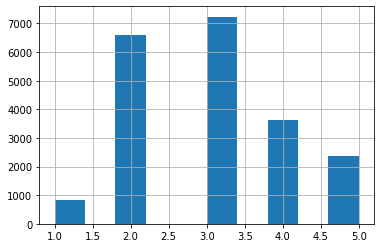

In [19]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [21]:
# 可以根据收入类别进行分层抽样。使用Scikit-Learn的StratifiedShuffleSplit函数：
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
# 看看这个运行是否如我们所料。首先，可以看看测试集中收入类别比例分布：
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
# 删除income_cat属性，将两个集合中的数据恢复原样
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 2.4 从数据探索和可视化中获得洞见

首先来看训练集。如果训练集非常庞大，你可以抽样出一个探索集，这样后面的操作更简单快捷一些。不过我们这个案例的数据集非常小，完全可以直接在整个训练集上操作。让我们先创建一个副本，这样可以随便尝试而不损害训练集：

### 2.4.1 将地理数据可视化

In [25]:
housing = strat_train_set.copy()
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


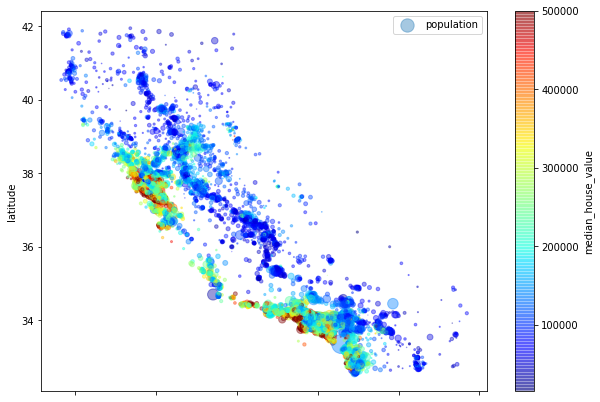

In [26]:
# 将训练集数据可视化
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# 红色昂贵，蓝色便宜，较大的圆圈表示人口较多的地区

### 2.4.2 寻找相关性

In [31]:
corr_matrix = housing.corr() # 每对属性之间的标准相关系数（也称为皮尔逊r）
corr_matrix["median_house_value"].sort_values(ascending=False) # 每个属性与房价中位数的相关性
# 相关系数仅测量线性相关性。所以它有可能遗漏非线性相关性。

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C6B35EF08>,
      dtype=object)

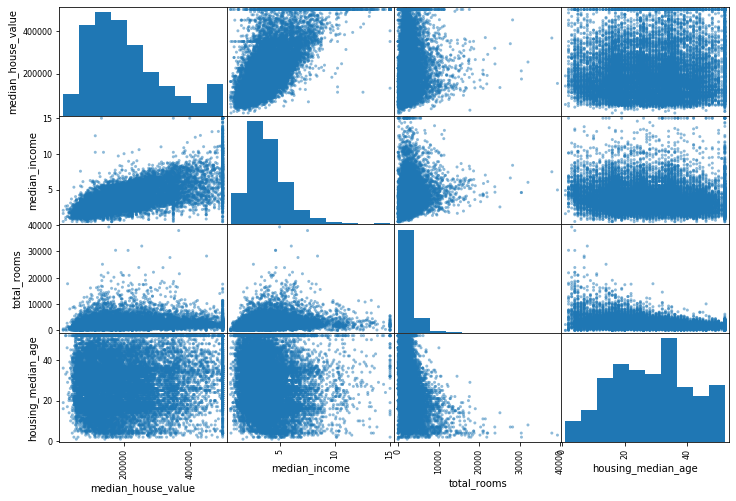

In [32]:
# pandas的scatter_matrix函数可以绘制出每个数值属性相对于其他数值属性的相关性.
# 这里我们仅关注那些与房价中位数属性最相关的3种属性
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# 对角线显示每个属性的直方图

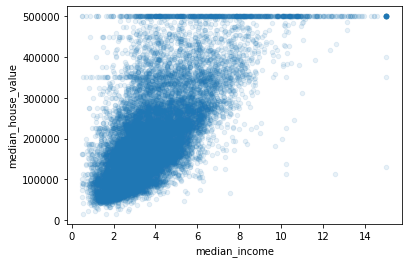

In [34]:
# 最有潜力能够预测房价中位数的属性是收入中位数，所以我们放大来看看其相关性的散点图
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

首先，二者的相关性确实很强，你可以清楚地看到上升的趋势，并且点也不是太分散。其次，前面我们提到过50万美元的价格上限在图中显出一条清晰的水平线。

### 2.4.3 试验不同属性的组合

在准备给机器学习算法输入数据之前，你要做的最后一件事应该是尝试各种属性的组合。例如，如果你不知道一个区域有多少个家庭，那么知道一个区域的“房间总数”也没什么用。你真正想要知道的是一个家庭的房间数量。同样，单看“卧室总数”这个属性本身也没什么意义，你可能想拿它和“房间总数”来对比，或者拿来同“每个家庭的人口数”这个属性组合似乎也挺有意思。我们来试着创建这些新属性：

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [42]:
>>> corr_matrix = housing.corr()
>>> corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

新属性bedrooms_per_room较之“房间总数”或“卧室总数”与房价中位数的相关性都要高得多。显然，卧室/房间比例更低的房屋往往价格更贵。同样，“每个家庭的房间数量”也比“房间总数”更具信息量——房子越大，价格越贵。

## 2.5 机器学习算法的数据准备

In [44]:
# 我们先回到训练集（strat_train_set），然后将预测器和标签分开，因为这里我们不一定对它们使用相同的数据处理方式
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 2.5.1 数据清理

前面我们已经注意到total_bedrooms属性有部分值缺失，所以我们要解决它。有以下三种选择：
* 1.放弃这些相应的区域。
* 2.放弃整个属性。
* 3.将缺失的值设置为某个值（0、平均数或者中位数等）。

In [45]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

如果选择方法3，当重新评估系统时，你需要更换测试集中的缺失值；或者在系统上线时，需要使用新数据替代缺失值。Scikit-Learn提供了一个非常容易上手的类来处理缺失值：SimpleImputer。

* fit():简单来说，就是求得训练集X的均值，方差，最大值，最小值,这些训练集X固有的属性。

* transform(): 在fit的基础上，进行标准化，降维，归一化等操作（看具体用的是哪个工具，如PCA，StandardScaler等）。

* fit_transform(): fit_transform是fit和transform的组合，既包括了训练又包含了转换。transform()和fit_transform()二者的功能都是对数据进行某种统一处理（比如标准化~N(0,1)，将数据缩放(映射)到某个固定区间，归一化，正则化等）

fit_transform(trainData)对部分数据先拟合fit，找到该part的整体指标，如均值、方差、最大值最小值等等（根据具体转换的目的），然后对该trainData进行转换transform，从而实现数据的标准化、归一化等等。

根据对之前部分trainData进行fit的整体指标，对剩余的数据（testData）使用同样的均值、方差、最大最小值等指标进行转换transform(testData)，从而保证train、test处理方式相同。所以，一般都是这么用：

> from sklearn.preprocessing import StandardScaler

> sc = StandardScaler()

> sc.fit_tranform(X_train)

> sc.tranform(X_test)


In [51]:
# 首先，你需要创建一个SimpleImputer实例，指定你要用属性的中位数值替换缺失值：
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#由于中位数值只能在数值属性上计算，所以我们需要创建一个没有文本属性ocean_proximity的数据副本：
housing_num = housing.drop("ocean_proximity", axis=1)

# 使用fit（）方法将imputer实例适配到训练数据：
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [55]:
# 现在，可以使用这个imputer将缺失值替换成中位数值从而完成训练集转换
X = imputer.transform(housing_num)

# 结果是一个包含转换后特征的NumPy数组。如果你想将它放回pandas DataFrame，也很简单
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### 2.5.2 处理文本和分类属性

到目前为止，我们只处理数值属性，但现在让我们看一下文本属性。在此数据集中，只有一个：ocean_proximity属性。我们看看前10个实例的值：

In [57]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


它不是任意文本，而是有限个可能的取值，每个值代表一个类别。因此，此属性是分类属性。大多数机器学习算法更喜欢使用数字，因此让我们将这些类别从文本转到数字。为此，我们可以使用Scikit-Learn的OrdinalEncoder类。

In [58]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [59]:
# 可以使用Categories_实例变量获取类别列表。（在这种情况下，这个列表包含一个数组，因为只有一个类别属性）
ordinal_encoder.categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

对于类别属性，各个类别之间没有大小之分，因此用0，1，2，3，4做属性值时机器学习模型会认为数字越大特征越重要，这样是不符合实际需求的。对于这种情况，独热编码（one-hot encoding）是更好的方式，sklearn中提供了OneHotEncoder类，可以将整数类别值转换为独热向量。我们用它来将类别编码为独热向量。

In [60]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

返回结果不是NumPy array格式，而是SciPy的稀疏矩阵。如果类别相当多时将会产生大量的新属性（列），并且结果中大部分位置都是0，只有很少位置是1，这就需要大量的存储空间。而稀疏矩阵的优点是只存储非0值的位置，节约空间。如果想转换成NumPy array格式，只需调用toarray()函数即可。

In [61]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [62]:
# 可以再次使用编码器的categories_实例变量来得到类别列表
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 2.5.3 自定义转换器
虽然Scikit-Learn提供了许多有用的转换器，但是你仍然需要为一些诸如自定义清理操作或组合特定属性等任务编写自己的转换器。

我们需要做的是创建一个类，然后应用以下三种方法：fit（）（返回self）、transform（）、fit_transform（）。你可以通过添加TransformerMixin作为基类，直接得到最后一种
方法。。同时，如果添加BaseEstimator作为基类（并在构造函数中避免args和kargs），你还能额外获得两种非常有用的自动调整超参数的方法（get_params（）和set_params（））。

例如，我们前面讨论过的组合属性(人均房间数等），这里有个简单的转换器类，用来添加组合后的属性：

In [64]:
#导入两个基类获得fit、transform方法
from sklearn.base import BaseEstimator, TransformerMixin 
#取出我们需要的属性列
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                          bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [70]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                    columns=list(housing.columns)+["rooms_per_household","population_per_household"],
                                    index=housing.index)
housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### 2.5.4 特征缩放（Feature Scaling）

最重要也最需要应用到数据上的转换就是特征缩放。如果输入的数值属性具有非常大的比例差异，往往会导致机器学习算法的性能表现不佳。案例中的房屋数据就是这样：房间总数的范围从6～39320，而收入中位数的范围是0～15。注意，目标值（标签）通常不需要缩放。

同比例缩放所有属性的两种常用方法是最小-最大缩放和标准化。
* 1.**最小-最大缩放（又叫作归一化‘normalization’）**：将值重新缩放使其最终范围归于0～1之间。实现方法是将每个值减去最小值并除以最大值和最小值的差。对此，Scikit-Learn提供了一个名为MinMaxScaler的转换器。如果出于某种原因，你希望范围不是0～1，那么可以通过调整超参数feature_range进行更改。


* 2.**标准化（Standardization）**则完全不一样：首先减去平均值（所以标准化值的均值总是零），然后除以方差，从而使得结果的分布具备单位方差。不同于最小-最大缩放的是，标准化不将值绑定到特定范围，对某些算法而言，这可能是个问题（例如，神经网络期望的输入值范围通常是0～1）。但是标准化的方法受异常值的影响更小。Scikit-Learn提供了一个标准化的转换器StandadScaler。

**WARNING**: 重要的是，跟所有转换一样，缩放器仅用来拟合训练集，而不是完整的数据集（包括测试集）。只有这样，才能使用它们来转换训练集和测试集（和新数据）。

### 2.5.5 转换流水线（Transformation Pipelines）
许多数据转换的步骤需要以正确的顺序来执行。而Scikit-Learn正好提供了Pipeline类来支持这样的转换。下面是一个数值属性的流水线示例：

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")), # 中位数填充缺失值
('attribs_adder', CombinedAttributesAdder()),  # 增加新属性
('std_scaler', StandardScaler()),              # 数据标准化
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr 

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

流水线的输入为一连串的数据挖掘步骤，其中最后一步必须是估算器，前几步是转换器。通俗理解就是前一个转换器的输出作为下一个转换的输入，依次对数据进行处理。最后，用位于流水线最后一步的估计器对数据进行分类。

当调用流水线的fit（）方法时，会在所有转换器上按照顺序依次调用fit_transform（），将一个调用的输出作为参数传递给下一个调用方法，直到传递到最终的估算器，则只会调用fit（）方法。流水线的方法与最终的估算器的方法相同。在本例中，最后一个估算器是StandardScaler，这是一个转换器，因此流水线有一个transform（）方法，可以按顺序将所有的转换应用到数据中。

**sklearn0.20版本中加入了ColumnTransformer可以同时处理所有列**

首先导入ColumnTransformer类，接下来获得数值列名称列表和类别列名称列表，然后构造一个ColumnTransformer。构造函数需要一个元组列表，其中每个元组都包含一个名字、一个转换器，以及一个该转换器能够应用的列名字（或索引）的列表。在此示例中，我们指定数值列使用之前定义的num_pipeline进行转换，类别列使用OneHotEncoder进行转换。最后，我们将ColumnTransformer应用到房屋数据：它将每个转换器应用于适当的列，并沿第二个轴合并输出（转换器必须返回相同数量的行）。

In [73]:
from sklearn.compose import ColumnTransformer
 
num_attribs = list(housing_num)    # 获取数值属性列名
cat_attribs = ["ocean_proximity"]  # 获取类别属性列名
 
full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs), 
    ("cat",OneHotEncoder(),cat_attribs)
])
 
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [75]:
print(housing_prepared.shape)
print(housing.shape)

(16512, 16)
(16512, 9)


为什么最终是16列属性？数值类型的列是8列，类别属性1列变成5列的OneHot，再加上组合的rooms_per_household等三列属性，最终8+5+3=16列。

In [76]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [77]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 2.6 选择和训练模型

### 2.6.1 线性回归模型

In [78]:
# 选择线性回归模型进行训练
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# 让我们用几个训练集的实例试试这个线性模型
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Truth Labels: ", list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Truth Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [80]:
# 预测结果偏差好像有些大。计算根均方误差看看：
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)  # np.sqrt()开平方根
lin_rmse

68628.19819848923

数据集中房价取值范围是120000至120000至265000，而均方根误差达到68628显然不是一个很好的结果，造成些的原因可能是模型欠拟合。

解决欠拟合主要有三个手段：选择更强的模型、喂入更多特征数据、减少对模型的约束。而在本案例中没有对模型进行任何约束，所以从前两个手段入手。


### 2.6.2 决策树模型

In [81]:
# 先尝试其它模型试试，例如决策树模型：
from sklearn.tree import DecisionTreeRegressor
 
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [82]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

均方误差为0，不可能这么好运，很可能模型对训练数据进行了过度拟合。如何判断是否过拟合了，使用测试数据集测试一下就知道了，可是测试数据集一般是盖棺定论的时候用的，而更常用的方法是从训练集中分隔出一部分数据当作验证集。而验证集就是训练、调整模型超参数用的

### 2.6.3 交叉验证

普通的做法是将训练集拆分成较小的训练集和验证集，再用拆分的训练集训练模型，用验证集评估模型。但sklearn中提供了更方便的工具：K折交叉验证（K-fold cross-validation）：它将训练集随机分割成10个不同的子集，每个子集称为一个折叠，然后对决策树模型进行10次训练和评估——每次挑选1个折叠进行评估，使用另外的9个折叠进行训练。产生的结果是一个包含10次评估分数的数组：

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

Scikit-Learn的交叉验证功能更倾向于使用效用函数（越大越好）而不是成本函数（越小越好），所以计算分数的函数实际上是负的MSE（一个负值）函数，这就是为什么上面的代码在计算平方根之前会先计算出-scores。

In [84]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())
display_scores(tree_rmse_scores)

Scores:  [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean:  71407.68766037929
Standard deviation:  2439.4345041191004


可以看到，误差大概在71407左右，而前非像之前那么好（均方误差为0）。而且决策树的效果似乎还没有线性回归好，线性回归均方误差大概68628左右。

用线性回归试试交叉验证：

In [85]:
lin_scores = cross_val_score(lin_reg, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.674001798346


的确，决策树模型确实是严重过拟合了，以至于表现得比线性回归模型还要糟糕。

### 2.6.4 随机森林模型
随机森林的工作原理：通过对特征的随机子集进行许多个决策树的训练，然后对其预测取平均。在多个模型的基础之
上建立模型，称为集成学习，这是进一步推动机器学习算法的好方法。这里我们将跳过大部分代码，因为与其他模型基本相同：

In [100]:
from sklearn.ensemble import RandomForestRegressor
 
forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)  # sklearn 0.22版本之后默认值为100
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [101]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

很明显，随机森林的效果比之前两个模型都好。再通过交叉验证检查模型是否有过拟合现象：

In [102]:
from sklearn.model_selection import cross_val_score
 
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores) 

Scores:  [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean:  50182.303100336096
Standard deviation:  2097.0810550985693


可以看到，训练集上的结果和验证集上的结果还是存在很大的差别，说明模型还是存在一定的过拟合。

每一个尝试过的模型你都应该妥善保存，以便将来可以轻松回到你想要的模型当中。记得还要同时保存超参数和训练过的参数，以及交叉验证的评分和实际预测的结果。这样你就可以轻松地对比不同模型类型的评分，以及不同模型造成的错误类型。通过Python的pickle模块或joblib库，你可以轻松保存Scikit-Learn模型，这样可以更有效地将大型NumPy数组（可以用pip安装）序列化。

## 2.7 模型微调（Fine-Tune）
假设你现在有了一个有效模型的候选列表。现在你需要对它们进行微调。我们来看几个可行的方法。

### 2.7.1 网络搜索（Grid Search）
基本思想：不断地尝试各种超参数组合，最终筛选出最佳超参数组合。sklearn提供GridSearchCV工具可以自动化地完成这个工作。

In [112]:
from sklearn.model_selection import GridSearchCV
 
para_grid = [
    {"n_estimators":[3,10,30],"max_features":[2,4,6,8]},                # 3*4=12种组合方式
    {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}  # 1*2*3=6种组合方式
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, para_grid, cv=5,scoring="neg_mean_squared_error", # 每种组合方式进行折交叉验证
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

总而言之，网格搜索将探索RandomForestRegressor超参数值的12+6=18种组合，并对每个模型进行5次训练（因为我们使用的是5-折交叉验证）。换句话说，总共会完成18×5=90次训练！这可能需要相当长的时间，但是完成后你就可以获得最佳的参数组合。

In [113]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [114]:
# 因为被评估的n_estimator最大值是8和30，所以你还可以试试更高的值，评分可能还会继续改善。
# 以下命令可以让你可以直接得到最好的估算器：
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

如果GridSearchCV被初始化为refit=True（默认值），那么一旦通过交叉验证找到了最佳估算器，它将在整个训练集上重新训练。这通常是个好方法，因为提供更多的数据很可能提升其性能。

In [116]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

在本例中，我们得到的最佳解决方案是将超参数max_features设置为8，将超参数n_estimators设置为30。这个组合的RMSE分数为49682，略优于之前使用默认超参数值的分数50 182。恭喜你，你成功地将模型调整到了最佳模式！

### 2.7.2 随机搜索
如果探索的组合数量较少（例如上一个示例），那么网格搜索是一种不错的方法。但是当超参数的搜索范围较大时，通常会优先选择使用随机搜索（RandomizedSearchCV）。这个类用起来与GridSearchCV类大致相同，但它不会尝试所有可能的组合，而是在每次迭代中为每个超参数选择一个随机值，然后对一定数量的随机组合进行评估。这种方法有两个显著好处：

* 如果运行随机搜索1000个迭代，那么将会探索每个超参数的1000个不同的值（而不是像网格搜索方法那样每个超参数仅探索少量几个值）。

* 通过简单地设置迭代次数，可以更好地控制要分配给超参数搜索的计算预算。

### 2.7.3 集成方法

还有一种微调系统的方法是将表现最优的模型组合起来。组合（或“集成”）方法通常比最佳的单一模型更好（就像随机森林比其所依赖的任何单个决策树模型更好一样），特别是当单一模型会产生不同类型误差时更是如此。

### 2.7.4 分析最佳模型及其误差

通过检查最佳模型，你总是可以得到一些好的洞见。例如在进行准确预测时，RandomForestRegressor可以指出每个属性的相对重要程度：

In [117]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [118]:
# 将这些重要性分数显示在对应的属性名称旁边：
>>> extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
>>> cat_encoder = full_pipeline.named_transformers_["cat"]
>>> cat_one_hot_attribs = list(cat_encoder.categories_[0])
>>> attributes = num_attribs + extra_attribs + cat_one_hot_attribs
>>> sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

有了这些信息，你可以尝试删除一些不太有用的特征（例如，本例中只有一个ocean_proximity是有用的，我们可以试着删除其他所有特征）。

### 2.7.5 通过测试集评估系统

通过一段时间的训练，你终于有了一个表现足够优秀的系统。现在是用测试集评估最终模型的时候了。这个过程没有什么特别的，只需要从测试集中获取预测器和标签，运行full_pipeline来转换数据（调用transform（）而不是fit_transform（）），然后在测试集上评估最终模型：

In [124]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

47730.22690385927

在某些情况下，泛化误差的这种点估计将不足以说服你启动生产环境：如果它仅比当前生产环境中的模型好0.1%？你可能想知道这个估计的精确度。为此，你可以使用scipy.stats.t.interval（）计算泛化误差的95%置信区间：

In [123]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

TIPS:如果之前进行过大量的超参数调整，这时的评估结果通常会略逊于你之前使用交叉验证时的表现结果（因为通过不断调整，系统在验证数据上终于表现良好，在未知数据集上可能达不到这么好的效果）。在本例中，结果虽然并非如此，但是当这种情况发生时，你一定不要继续调整超参数，不要试图再努力让测试集的结果变得好看一些，因为这些改进在泛化到新的数据集时又会变成无用功。

## 2.8 部署、监视并维护模型系统

1.现在你可以将模型部署到生产环境中。
* 一种方法是保存训练好的Scikit-Learn模型（使用joblib），包括完整的预处理和预测流水线，然后在你的生产环境中加载经过训练的模型并通过调用prepare（）方法来进行预测。
* 另一种流行的策略是将模型部署到云上，例如在Google Cloud AIPlatform（以前称为Google Cloud ML Engine）上。

2.但是部署并不是故事的结束。你还需要编写监控代码以定期检查系统的实时性能，并在系统性能降低时触发警报。因为模型会随着时间的流逝而“腐烂”：的确，世界在变化，因此，如果使用去年的数据对模型进行训练，则可能不会适应今天的数据。

3.如果数据不断发展，则需要更新数据集并定期重新训练模型。你应该使整个过程尽可能地自动化。可以通过以下操作来使其自动化：
* 定期收集新数据并做标记（例如，使用人工评估者）
* 编写脚本来训练模型并自动微调超参数。该脚本可以根据你的需求（例如每天或每周）自动运行。
* 编写另一个脚本，该脚本将在更新的测试集上评估新模型和旧模型，如果性能良好，则将该模型部署到生产环境中（如果性能降低，请调查原因）。
* 最后，请保留每个模型的备份，准备好流程和工具，以便在新模型出现时快速回滚到以前的模型，以防新模型由于某种情况开始出现严重故障。进行备份还可以轻松实现将新模型与以前的模型进行比较。同样，你应该保留每个版本的数据集，以便在新数据集遭到破坏的情况下可以回滚到先前的数据集（如果事实能证明添加到其中的新数据都是离群值）。备份数据集还可以针对任何先前的数据集来评估任何模型。